In [3]:
import tifffile
import numpy as np
import napari

In [5]:
data = tifffile.imread('data/multi_cell_data.tif')
mean_proj = data.mean(axis=0)

# **Napari GUI from the Notebook: Labeling Images**

This session explores how to use the Napari image viewer directly from a Jupyter notebook for manual annotation of calcium imaging data. You will learn to load imaging datasets, visualize them frame-by-frame, draw and manage regions of interest (ROIs), and organize those labels in a way that prepares the data for downstream analysis. The goal is to build a clean, intuitive, and reproducible manual labeling pipeline for multi-cell calcium imaging.

## **Section One: Drawing ROIs in Napari**

Napari allows users to interactively draw regions of interest (ROIs) over cells in calcium imaging data. In this section, you will learn how to navigate the imaging dataset inside Napari and manually mark neurons using either shapes or label tools. Manual ROI labeling is often the first step in analyzing calcium signals from raw movies, and it ensures that the cell outlines used for analysis have been visually verified and curated by a human observer.

**Sub-sections (for reference):**
- **Loading Image Data into Napari Viewer**  
  Load multi-cell TIFF data into Napari from a notebook interface.  
  *Supports overarching goal by enabling image-based interaction essential for labeling.*

- **Navigating Through Time and Planes**  
  Use Napari’s time slider and contrast adjustment tools to locate neurons across frames.  
  *Supports overarching goal by allowing precise identification of ROIs across time.*

- **Using the Shapes or Labels Tool for ROI Drawing**  
  Draw ROIs using built-in tools like polygons or the paintbrush.  
  *Supports overarching goal by providing direct tools for neuron annotation.*

- **Saving or Exporting Manual ROIs**  
  Store labeled regions as arrays or masks for future use.  
  *Supports overarching goal by making annotations reusable and ready for downstream analysis.*

In [9]:
viewer = napari.view_image(data.mean(axis=0), name="Calcium Imaging Movie")

In [25]:
roi1 = viewer.layers['roi1'].data
roi2 = viewer.layers['roi2'].data
roi3 = viewer.layers['roi3'].data
roi4 = viewer.layers['roi4'].data

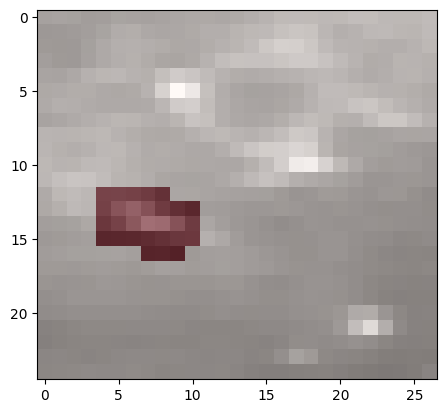

In [26]:
import matplotlib.pyplot as plt

plt.imshow(mean_proj, cmap='gray')
plt.imshow(roi1, cmap='Reds', alpha=0.5)

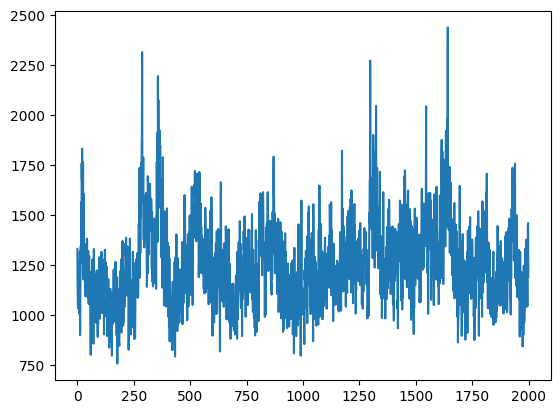

In [35]:
y_coords, x_coords = np.nonzero(roi4)
coords = list(zip(x_coords, y_coords))

traces = np.array([data[:, y, x] for (x,y) in coords])
plt.plot(np.median(traces, axis=0));

## **Section Two: Viewing Calcium Imaging Data with `view_image()`**

Before any labeling can begin, it is necessary to load and view the imaging dataset. This section introduces the `view_image()` function, which allows users to load a calcium imaging movie into Napari directly from a notebook. You will learn how to interact with the image layer, adjust display settings, and inspect neuronal activity across time. This setup provides a critical foundation for labeling, enabling users to work directly on temporally rich imaging data.

**Sub-sections (for reference):**
- **Displaying TIFF Stack with `view_image()`**  
  Load calcium imaging data and open it using `view_image()` from a notebook.  
  *Supports overarching goal by enabling structured, programmable data viewing.*

- **Adjusting Visualization Settings**  
  Modify colormaps, contrast limits, and interpolation to improve visibility of cell bodies.  
  *Supports overarching goal by enhancing the visual context for ROI placement.*

- **Interacting with the Viewer API**  
  Programmatically control zoom levels, slicing, and frame navigation.  
  *Supports overarching goal by providing flexible tools to fine-tune the labeling interface.*

- **Adding Metadata to the Image Layer**  
  Attach context like frame rate or acquisition info to the image layer.  
  *Supports overarching goal by documenting the data for reproducibility and interpretation.*

## **Section Three: Managing Labels with Napari’s `Labels` Layer**

After defining ROIs, the next step is to structure and manage them in a way that is compatible with further analysis. This section introduces Napari’s `Labels` layer, which enables users to assign unique identifiers to individual regions, refine their boundaries, and export them for use in downstream pipelines. Working with a structured label format ensures consistency across annotation sessions and prepares the data for integration with automated tools or trace extraction workflows.

**Sub-sections (for reference):**
- **Creating a Labels Layer from Existing ROIs**  
  Convert shapes or manual selections into a `Labels` layer.  
  *Supports overarching goal by transforming annotations into structured data.*

- **Assigning and Managing Label IDs**  
  Ensure that each neuron has a unique ID and resolve any overlaps.  
  *Supports overarching goal by maintaining clarity and consistency in labeled data.*

- **Editing and Refining Labels**  
  Use brush tools or erasers to clean up or separate overlapping regions.  
  *Supports overarching goal by allowing refinement of labels to match biological structures.*

- **Exporting Labels for Downstream Analysis**  
  Save the labels in formats compatible with tools like CaImAn or Suite2p.  
  *Supports overarching goal by preparing data for quantitative trace extraction.*